<a href="https://colab.research.google.com/github/AngelaCorvino/BrainAge/blob/main/features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data exploration and analysis**

We explore a data sample and carry out a basic statistical data analysis.
The data consists in a table containing the brain features computed by means of the FreeSurfer segmentation software for the ABIDE I data cohort.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats

# ** Reading the data set**

We have to read a pandas DataFrame table where each of the 915 row corresponds to a different subject and the 424 columns (419 brain features) contain descriptive characteristics of each subjects (e.g. age, IQ, morphometric brain features). 

In [2]:
dataset_file = 'https://raw.githubusercontent.com/AngelaCorvino/BrainAge/main/data/FS_features_ABIDE_males.csv'
df = pd.read_csv(dataset_file,sep=';')
df.size
df.shape
df.head(5)

,FILE_ID,AGE_AT_SCAN,SEX,FIQ,DX_GROUP,lh_caudalanteriorcingulate_SurfArea,lh_caudalanteriorcingulate_GrayVol,lh_caudalanteriorcingulate_ThickAvg,lh_caudalanteriorcingulate_ThickStd,lh_caudalanteriorcingulate_MeanCurv,...,CC_Mid_Anterior_Volume_mm3,CC_Anterior_Volume_mm3,lh_MeanThickness,rh_MeanThickness,VentricleChoroidVol,lhCortexVol,rhCortexVol,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol,TotalGrayVol
0,Caltech_0051456,55.4,1,126.0,1,909,2684,2.918,0.481,0.134,...,788.7,929.8,2.52039,2.52379,42065,258703.4443,262670.1207,262254.9768,265741.1295,701211.5651
1,Caltech_0051457,22.9,1,107.0,1,1425,4623,3.046,0.543,0.116,...,907.3,1066.6,2.55533,2.56998,28505,321132.1284,317004.7945,304528.2513,301555.0187,841485.9229
2,Caltech_0051458,39.2,1,93.0,1,1205,3940,2.987,0.423,0.104,...,964.2,1104.3,2.64518,2.63160,13383,266418.9917,266456.1701,271683.1723,266494.7088,726728.1619
3,Caltech_0051459,22.8,1,106.0,1,1413,4711,2.879,0.587,0.120,...,811.0,1056.7,2.70814,2.72762,6849,307157.4469,310540.0389,258618.7918,255480.2694,794676.4859
4,Caltech_0051461,37.7,1,99.0,1,875,2270,2.473,0.475,0.104,...,844.8,1015.4,2.59002,2.61012,73159,263932.5269,269417.2519,242330.5838,232809.9268,714122.7788


Adding a feature "Site" which is the acquisition site

In [3]:
df['Site'] = df.FILE_ID.apply(lambda x: x.split('_')[0])
df.size
df.shape

(915, 425)

 we define a new variable as the sum of L and R white matter

In [4]:

TotalWhiteVol = df.lhCerebralWhiteMatterVol+df.rhCerebralWhiteMatterVol
#TotalWhiteVol /= 0.5*(df.lhCerebralWhiteMatterVol+df.rhCerebralWhiteMatterVol)
df['TotalWhiteVol'] = TotalWhiteVol
df.head(5)

,FILE_ID,AGE_AT_SCAN,SEX,FIQ,DX_GROUP,lh_caudalanteriorcingulate_SurfArea,lh_caudalanteriorcingulate_GrayVol,lh_caudalanteriorcingulate_ThickAvg,lh_caudalanteriorcingulate_ThickStd,lh_caudalanteriorcingulate_MeanCurv,...,lh_MeanThickness,rh_MeanThickness,VentricleChoroidVol,lhCortexVol,rhCortexVol,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol,TotalGrayVol,Site,TotalWhiteVol
0,Caltech_0051456,55.4,1,126.0,1,909,2684,2.918,0.481,0.134,...,2.52039,2.52379,42065,258703.4443,262670.1207,262254.9768,265741.1295,701211.5651,Caltech,527996.1063
1,Caltech_0051457,22.9,1,107.0,1,1425,4623,3.046,0.543,0.116,...,2.55533,2.56998,28505,321132.1284,317004.7945,304528.2513,301555.0187,841485.9229,Caltech,606083.2700
2,Caltech_0051458,39.2,1,93.0,1,1205,3940,2.987,0.423,0.104,...,2.64518,2.63160,13383,266418.9917,266456.1701,271683.1723,266494.7088,726728.1619,Caltech,538177.8811
3,Caltech_0051459,22.8,1,106.0,1,1413,4711,2.879,0.587,0.120,...,2.70814,2.72762,6849,307157.4469,310540.0389,258618.7918,255480.2694,794676.4859,Caltech,514099.0612
4,Caltech_0051461,37.7,1,99.0,1,875,2270,2.473,0.475,0.104,...,2.59002,2.61012,73159,263932.5269,269417.2519,242330.5838,232809.9268,714122.7788,Caltech,475140.5106


\Dividing the data set in ASD and TD and check their shape


In [5]:
df_ASD=df.loc[df.DX_GROUP==1]
df_TD=df.loc[df.DX_GROUP==-1]
df_ASD.size
df_TD.shape
df_TD.Site

15     Caltech
16     Caltech
17     Caltech
18     Caltech
19     Caltech
        ...   
890       Yale
891       Yale
892       Yale
893       Yale
894       Yale
Name: Site, Length: 464, dtype: object

# **# Representing data**
We are going to analize the TD dataset

# **Histograms**

By convention, in this dataset missing values in the FIQ column are indicated as either -9999 or 0 so we mask them 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f718e632ed0>]],
      dtype=object)

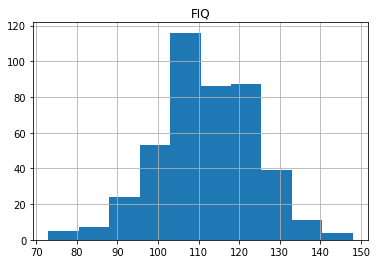

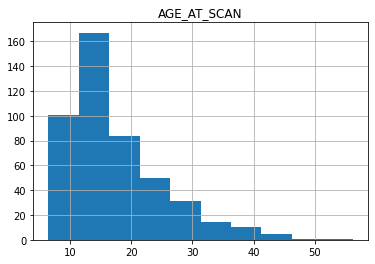

In [6]:
df_TD[df_TD.FIQ>0].hist('FIQ')
df_TD.hist(['AGE_AT_SCAN'])

# Boxplots
We can make a boxplot representing the age values for each acquisition site.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


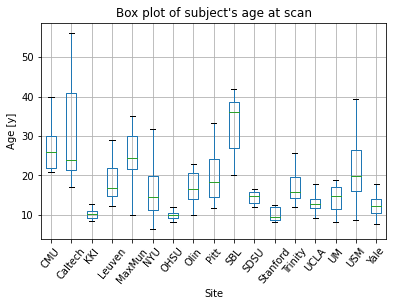

In [7]:
boxplot = df_TD.boxplot(column=['AGE_AT_SCAN'], by='Site', showfliers=False)
boxplot.set_title('Box plot of subject\'s age at scan')
boxplot.get_figure().suptitle('');
boxplot.set_ylabel('Age [y]')
boxplot.set_xticklabels(labels=boxplot.get_xticklabels(), rotation=50);

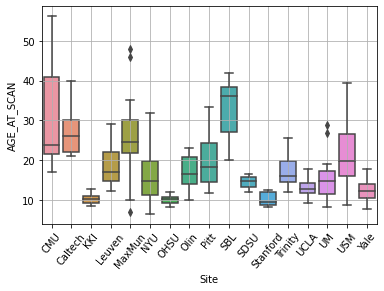

In [8]:
sns_boxplot = sns.boxplot(x='Site', y='AGE_AT_SCAN', data=df_TD)
sns_boxplot.set_xticklabels(labels=boxplot.get_xticklabels(), rotation=50);
sns_boxplot.grid()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f718dc7b450>]],
      dtype=object)

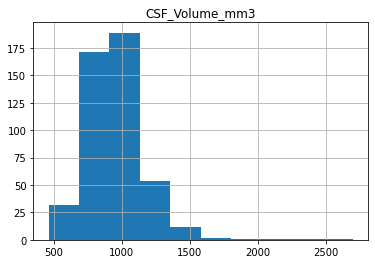

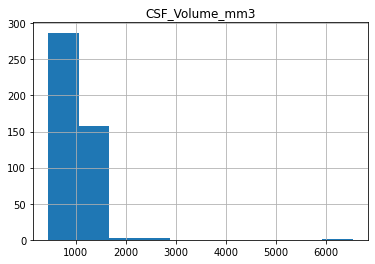

In [9]:
df_TD[df_TD.CSF_Volume_mm3>0].hist('CSF_Volume_mm3')
df_ASD[df_ASD.CSF_Volume_mm3>0].hist('CSF_Volume_mm3')


# **Basic data analysis**

 First of all we have to check for normality of our data distributions. We can use the scipy.stats.normaltest which test whether a sample differs from a normal distribution. This function tests the null hypothesis that a sample comes from a normal distribution

 In case the assumption of normality is not satisfied for a specific sample, non parametric tests to compare two samples can be carried out: • Wilcoxon-Mann-Whitney tests if two samples come from the same population

In [10]:
k2, p_asd = scipy.stats.normaltest(df_ASD.AGE_AT_SCAN)
k2, p_ctr = scipy.stats.normaltest(df_TD.AGE_AT_SCAN)
print(p_asd, p_ctr)
test_res = scipy.stats.mannwhitneyu(df_ASD.AGE_AT_SCAN, df_TD.AGE_AT_SCAN)
test_res

7.754904468505647e-42 4.366359373856672e-28


MannwhitneyuResult(statistic=102278.5, pvalue=0.27801919589384394)

We can do the same analysis for the FIQ. First we have to remove from the dataframes the entries with FIQ = -9999.

In [11]:
df_ASD = df_ASD[df_ASD.FIQ >0]
df_TD = df_TD[df_TD.FIQ >0]
k2, p_asd = scipy.stats.normaltest(df_ASD.FIQ)
k2, p_ctr = scipy.stats.normaltest(df_TD.FIQ)
print(p_asd, p_ctr)

#test_res = scipy.stats.ttest_ind(df_ASD.FIQ, df_TD.FIQ)
test_res

0.5917444872576755 0.4198194732498861


MannwhitneyuResult(statistic=102278.5, pvalue=0.27801919589384394)

# Finding outliers in the distributions

# **Features selection methods**
We want to understand the feautures suted to predict the age. For thus reson we are going to exolore to methods for feauture selection.

# Correlations among variables
We want to see how a restricted set of variables correlates with the age at scan

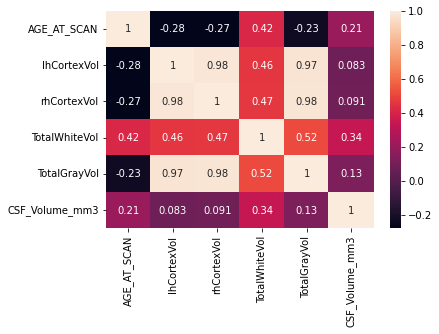

In [12]:
features = [ 'AGE_AT_SCAN','lhCortexVol', 'rhCortexVol',
       'TotalWhiteVol',  'TotalGrayVol', 'CSF_Volume_mm3',
       ]
df_TDrestricted=df_TD[features]
#sns.heatmap(df_TDrestricted.drop('AGE_AT_SCAN', axis=1).corr(),annot=True)
sns.heatmap(df_TDrestricted.corr(),annot=True)

The heat map uses scipy.stats.pearsonr which returns the Pearson's correlation coefficient and p-value. We can reproduce the heat values 

In [13]:
res = scipy.stats.pearsonr(df_TD['rhCortexVol'], df_TD['AGE_AT_SCAN'])
res

(-0.27498460105292394, 6.199209301084142e-09)

Let us generalize the anilys to all the features.
Remeber that the methos .corr() Compute pairwise correlation of columns, excluding NA/null values. 
DataFrame.corr(method='pearson', min_periods=1)
where min_periods is Minimum number of observations required per pair of columns to have a valid result. Currently only available for Pearson and Spearman correlation.

In [14]:
agecorr_TD=df_TD.corr()['AGE_AT_SCAN'] #we acces to the column relative to age


We decide to use the feautures wose correlation with age at scan is >0.5

In [15]:
agecorr_TD[np.abs(agecorr_TD)>0.4]

AGE_AT_SCAN                         1.000000
lh_cuneus_ThickAvg                 -0.506638
lh_cuneus_ThickStd                 -0.400102
lh_inferiorparietal_ThickAvg       -0.488796
lh_inferiorparietal_ThickStd       -0.484435
lh_lingual_ThickAvg                -0.501001
lh_paracentral_GrayVol             -0.408816
lh_paracentral_ThickAvg            -0.498223
lh_parsopercularis_ThickStd        -0.409211
lh_parsorbitalis_ThickStd          -0.404158
lh_parstriangularis_ThickStd       -0.480385
lh_pericalcarine_ThickAvg          -0.402302
lh_postcentral_ThickStd            -0.453719
lh_posteriorcingulate_ThickAvg     -0.441896
lh_posteriorcingulate_ThickStd     -0.408432
lh_precuneus_GrayVol               -0.442559
lh_precuneus_ThickAvg              -0.536501
lh_precuneus_ThickStd              -0.523614
lh_rostralmiddlefrontal_ThickStd   -0.524324
lh_superiorfrontal_ThickAvg        -0.472713
lh_superiorfrontal_ThickStd        -0.519959
lh_superiorparietal_ThickAvg       -0.434554
lh_superio

In [ ]:
features=agecorr_TD[np.abs(agecorr_TD)>0.5]
#print(type(features))
listoffeatures=features.keys()
#print(type(listoffeatures))
listoffeatures = listoffeatures.drop('AGE_AT_SCAN')
np.shape(listoffeatures)

# Importance for the specific regression algorithm 

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


Features selected by SelectFromModel: ['lh_caudalanteriorcingulate_CurvInd' 'rh_parahippocampal_CurvInd']


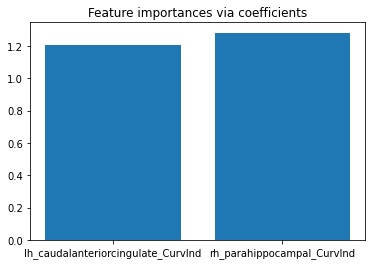

In [17]:
#model_name=LinearRegression()
#model_name=RandomForestRegressor()
model_name=RidgeCV()
# Splitting data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(df_TD.drop(['AGE_AT_SCAN','FILE_ID', 'Site'], axis=1), df_TD['AGE_AT_SCAN'], test_size=0.30, random_state=0)
model_save = model_name.fit(X_train, y_train)

importance = np.abs(model_save.coef_) #how do we want to define the importance? Not every model has .coef_ method...

threshold = np.sort(importance)[-3] +0.001
sfm = SelectFromModel(model_save, threshold=threshold).fit(X_train, y_train)
feature_names = np.array(X_train.columns)
print(f"Features selected by SelectFromModel: {feature_names[sfm.get_support()]}")

plt.bar(height=importance[sfm.get_support()], x=feature_names[sfm.get_support()])
plt.title("Feature importances via coefficients")
plt.show()

# Accounting for confounders into the analysis
To mitigate the effect of the different acquisition sites on the features, we have to harmonize data across sites. We can attempt to normalize them by applying, for example, a per-site feature normalization.
The sklearn.RobustScaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

In [18]:
from sklearn.preprocessing import RobustScaler
df_TD_site1 = df_TD[df_TD.Site == 'KKI']
df_TD_site2 = df_TD[df_TD.Site == 'Stanford']
df_TD_site3 = df_TD[df_TD.Site == 'UCLA']